<a href="https://colab.research.google.com/github/zainsuch19/entropy-neural-network/blob/main/entropy_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Shanons entropy is a measure of the uncertainity or randomness in a signal. Given an
an input signal, my network will output a single representing its shannons entropy'''

'Shanons entropy is a measure of the uncertainity or randomness in a signal. Given an\nan input signal, my network will output a single representing its shannons entropy'

In [ ]:
'''We will generate synthetic data that represents signal segments and their
corresponding shannon entropy
H(X) = -sum(p(x)log(p(x)))
'''

'We will generate synthetic data that represents signal segments and their\ncorresponding shannon entropy\nH(X) = -sum(p(x)log(p(x)))\n'

In [ ]:
import numpy as np

def generate_synthetic_data(num_samples=10000, num_bins=10):
    X = np.random.rand(num_samples, 100)  # Generate random input data
    y = []

    for sample in X:
        hist, _ = np.histogram(sample, bins=num_bins, range=(0, 1), density=True)
        hist += 1e-9  # Prevent log(0)
        entropy = -np.sum(hist * np.log(hist))
        y.append(entropy)

    y = np.array(y).reshape(-1, 1)
    return X, y

# Example of generating data
X, y = generate_synthetic_data()
print(X.shape, y.shape)  # Should output (10000, 100), (10000, 1)


(10000, 100) (10000, 1)


In [ ]:
#Implementing several dense layers with ReLU(Rectified Linear Unit)

import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape=(100,)):
    model = models.Sequential()

    # Add input layer (Flatten the input)
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model

# Build the model
model = build_model()
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,297 (91.00 KB)

 Trainable params: 23,297 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''Now choosing a loss function. For this task mean squared error is a good choice'''
#Training the model
# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"Model Loss: {loss}, Mean Absolute Error: {mae}")


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0933 - mae: 0.2234 - val_loss: 0.0505 - val_mae: 0.1745
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0491 - mae: 0.1749 - val_loss: 0.0502 - val_mae: 0.1735
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0487 - mae: 0.1748 - val_loss: 0.0499 - val_mae: 0.1744
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0498 - mae: 0.1758 - val_loss: 0.0506 - val_mae: 0.1735
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0471 - mae: 0.1716 - val_loss: 0.0496 - val_mae: 0.1769
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0477 - mae: 0.1722 - val_loss: 0.0531 - val_mae: 0.1740
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0474 - mae: 0.1715 - val_loss: 0.0497 - val_mae: 0.1735
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0472 - mae: 0.1724 - val_loss: 0.0508 - val_mae: 0.1722
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


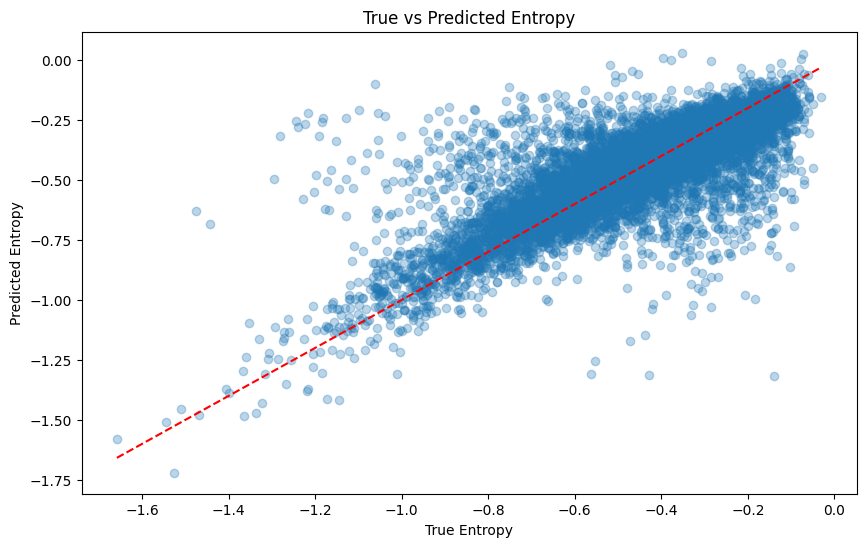

In [ ]:
import matplotlib.pyplot as plt

# Predict entropy for the test data
y_pred = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of equality
plt.xlabel("True Entropy")
plt.ylabel("Predicted Entropy")
plt.title("True vs Predicted Entropy")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your input features and target variable
# X: features (input variables)
# y: target (output variable, i.e., Shannon's entropy)

# Step 1: Split the data into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2 of the original data set, resulting in 60/20/20 split

# Step 3: Normalize the features (very important for neural networks)
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the validation and test sets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9969 - mae: 0.7188 - val_loss: 0.2136 - val_mae: 0.2481
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3039 - mae: 0.3430 - val_loss: 0.1842 - val_mae: 0.2144
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2232 - mae: 0.2670 - val_loss: 0.1702 - val_mae: 0.1993
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1847 - mae: 0.2265 - val_loss: 0.1626 - val_mae: 0.1932
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1651 - mae: 0.2036 - val_loss: 0.1530 - val_mae: 0.1866
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1543 - mae: 0.1946 - val_loss: 0.1452 - val_mae: 0.1832
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1465 - mae: 0.1887 - val_loss: 0.1398 - val_mae: 0.1819
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1364 - mae: 0.1816 - val_loss: 0.1343 - val_mae: 0.1808
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1319 - mae: 0.1819 - va

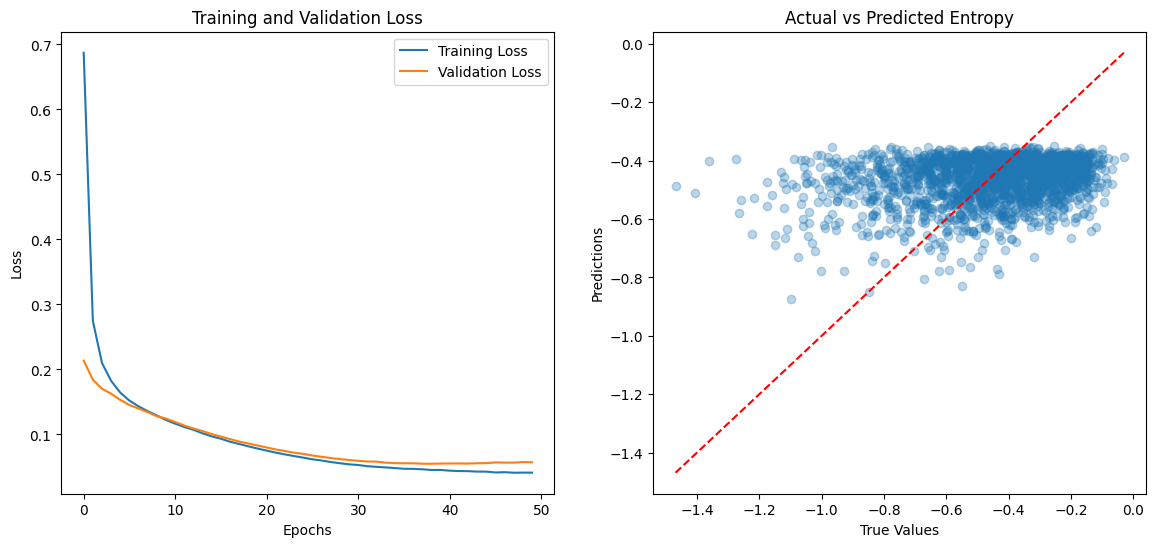

Mean Absolute Error: 0.1730354353963877


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=64,
                    verbose=1)

# Predict entropy for the test data
y_pred = model.predict(X_test)

# Plot the training and validation loss
plt.figure(figsize=(14, 6))

# Training and Validation Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs Predicted Entropy')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_model(input_shape=(100,)):
    model = models.Sequential()

    # Add input layer (Flatten the input)
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers with increased complexity
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())  # Add Batch Normalization
    model.add(layers.Dropout(0.3))  # Increased dropout for regularization

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(64, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model with a lower learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='mean_squared_error', metrics=['mae'])

    return model

# Build the model
model = build_model()

# Summary of the model
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training the model with new callbacks
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"Model Loss: {loss}, Mean Absolute Error: {mae}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,609 (268.00 KB)

 Trainable params: 67,841 (265.00 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8690 - mae: 0.7149 - val_loss: 0.0885 - val_mae: 0.2361 - learning_rate: 5.0000e-04
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2539 - mae: 0.3974 - val_loss: 0.1064 - val_mae: 0.2563 - learning_rate: 5.0000e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1735 - mae: 0.3291 - val_loss: 0.0900 - val_mae: 0.2350 - learning_rate: 5.0000e-04
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1284 - mae: 0.2828 - val_loss: 0.0774 - val_mae: 0.2175 - learning_rate: 5.0000e-04
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1059 - mae: 0.2565 - val_loss: 0.0672 - val_mae: 0.2039 - learning_rate: 5.0000e-04
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0871 - mae: 0.2333 - val_loss: 0.0621 - val_mae: 0.1967 - learning_rate: 5.0000e-04
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0735 - mae: 0.2123 - val_loss: 0.0583 - val_mae: 0.1884

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import math

# Function to calculate Shannon's entropy for categorical data
def shannon_entropy_categorical(data):
    # Count the occurrences of each category
    counts = Counter(data)
    total = len(data)

    # Calculate probabilities
    probs = [count / total for count in counts.values()]

    # Shannon's entropy formula
    entropy = -sum([p * math.log2(p) for p in probs if p > 0])
    return entropy

# Function to calculate Shannon's entropy for numerical data by binning it
def shannon_entropy_numerical(data, bins=10):
    # Bin the data into 'bins' number of categories
    binned_data = pd.cut(data, bins=bins, labels=False)

    # Calculate Shannon's entropy for the binned data
    return shannon_entropy_categorical(binned_data)

# Example usage
# Create sample categorical and numerical data
categorical_data = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple', 'apple']
numerical_data = np.random.rand(1000)  # Random numerical data between 0 and 1

# Calculate entropy for categorical data
cat_entropy = shannon_entropy_categorical(categorical_data)
print(f"Shannon Entropy (Categorical): {cat_entropy}")

# Calculate entropy for numerical data
num_entropy = shannon_entropy_numerical(numerical_data, bins=10)
print(f"Shannon Entropy (Numerical): {num_entropy}")


Shannon Entropy (Categorical): 1.3787834934861753
Shannon Entropy (Numerical): 3.3196221108863226


In [ ]:
import numpy as np

# Original data (assuming you've generated 'X' with your previous code)
X = np.random.random((10000, 100))  # Example of synthetic data

# Function to add Gaussian noise to the data
def augment_data_with_noise(X, noise_level=0.1):
    noisy_X = X + np.random.normal(scale=noise_level, size=X.shape)
    return noisy_X

# Function to apply scaling and shifting to the data
def augment_data_with_scaling(X, scale_factor=1.5, shift_value=0.5):
    scaled_X = X * scale_factor + shift_value
    return scaled_X

# Function to apply bootstrapping (random sampling with replacement)
def bootstrap_data(X, n_samples=10000):
    indices = np.random.randint(0, X.shape[0], n_samples)
    bootstrapped_X = X[indices]
    return bootstrapped_X

# Generate augmented datasets
X_noisy = augment_data_with_noise(X, noise_level=0.1)
X_scaled = augment_data_with_scaling(X, scale_factor=1.5, shift_value=0.5)
X_bootstrap = bootstrap_data(X)

# Combine all augmented data into one array (optional)
X_combined = np.vstack([X, X_noisy, X_scaled, X_bootstrap])

# Print the shapes of augmented data
print("Original X shape:", X.shape)
print("Noisy X shape:", X_noisy.shape)
print("Scaled X shape:", X_scaled.shape)
print("Bootstrapped X shape:", X_bootstrap.shape)
print("Combined X shape:", X_combined.shape)

# You can also calculate Shannon Entropy for augmented data
def calculate_entropy(X):
    _, counts = np.unique(X, return_counts=True)
    probabilities = counts / len(X)
    return -np.sum(probabilities * np.log2(probabilities))

# Example entropy calculations for augmented data
entropy_original = calculate_entropy(X.flatten())
entropy_noisy = calculate_entropy(X_noisy.flatten())
entropy_scaled = calculate_entropy(X_scaled.flatten())
entropy_bootstrap = calculate_entropy(X_bootstrap.flatten())

print(f"Shannon Entropy (Original): {entropy_original}")
print(f"Shannon Entropy (Noisy): {entropy_noisy}")
print(f"Shannon Entropy (Scaled): {entropy_scaled}")
print(f"Shannon Entropy (Bootstrapped): {entropy_bootstrap}")


Original X shape: (10000, 100)
Noisy X shape: (10000, 100)
Scaled X shape: (10000, 100)
Bootstrapped X shape: (10000, 100)
Combined X shape: (40000, 100)
Shannon Entropy (Original): 19.931568569324206
Shannon Entropy (Noisy): 19.931568569324206
Shannon Entropy (Scaled): 19.931568569324206
Shannon Entropy (Bootstrapped): 19.105389429560862


In [ ]:
import numpy as np
from sklearn.utils import resample
from scipy.stats import entropy

# Function to calculate Shannon entropy for numerical data
def calculate_shannon_entropy(X):
    _, counts = np.unique(X, return_counts=True)
    probabilities = counts / len(X)
    return entropy(probabilities)

# Data augmentation functions
def augment_data_with_noise(X, noise_level=1.0):
    noisy_X = X + np.random.normal(scale=noise_level, size=X.shape)
    return noisy_X

def scale_data(X, scale_factor=2.0):
    scaled_X = X * scale_factor
    return scaled_X

def bootstrap_data(X):
    bootstrapped_X = resample(X, replace=True, n_samples=len(X))
    return bootstrapped_X

def add_missing_values(X, drop_rate=0.1):
    X_missing = X.copy()
    n_missing = int(drop_rate * X.size)
    indices = np.unravel_index(np.random.choice(X.size, n_missing, replace=False), X.shape)
    X_missing[indices] = np.nan
    return X_missing

def nonlinear_transform(X):
    return np.log(np.abs(X) + 1)

# Generate synthetic data
X = np.random.rand(10000, 100)

# Apply transformations
X_noisy = augment_data_with_noise(X, noise_level=2.0)  # Increase noise level
X_scaled = scale_data(X, scale_factor=3.0)
X_bootstrapped = bootstrap_data(X)
X_missing = add_missing_values(X, drop_rate=0.15)  # Add 15% missing values
X_nonlinear = nonlinear_transform(X)

# Combine all datasets
X_combined = np.vstack([X, X_noisy, X_scaled, X_bootstrapped, X_missing, X_nonlinear])

# Calculate entropy for each dataset
entropy_original = calculate_shannon_entropy(X.flatten())
entropy_noisy = calculate_shannon_entropy(X_noisy.flatten())
entropy_scaled = calculate_shannon_entropy(X_scaled.flatten())
entropy_bootstrapped = calculate_shannon_entropy(X_bootstrapped.flatten())
entropy_missing = calculate_shannon_entropy(X_missing[np.isfinite(X_missing)].flatten())  # Exclude missing values
entropy_nonlinear = calculate_shannon_entropy(X_nonlinear.flatten())

# Output the results
print(f"Original X shape: {X.shape}")
print(f"Noisy X shape: {X_noisy.shape}")
print(f"Scaled X shape: {X_scaled.shape}")
print(f"Bootstrapped X shape: {X_bootstrapped.shape}")
print(f"Missing X shape: {X_missing.shape}")
print(f"Nonlinear X shape: {X_nonlinear.shape}")
print(f"Combined X shape: {X_combined.shape}")

print(f"Shannon Entropy (Original): {entropy_original}")
print(f"Shannon Entropy (Noisy): {entropy_noisy}")
print(f"Shannon Entropy (Scaled): {entropy_scaled}")
print(f"Shannon Entropy (Bootstrapped): {entropy_bootstrapped}")
print(f"Shannon Entropy (Missing): {entropy_missing}")
print(f"Shannon Entropy (Nonlinear): {entropy_nonlinear}")


Original X shape: (10000, 100)
Noisy X shape: (10000, 100)
Scaled X shape: (10000, 100)
Bootstrapped X shape: (10000, 100)
Missing X shape: (10000, 100)
Nonlinear X shape: (10000, 100)
Combined X shape: (60000, 100)
Shannon Entropy (Original): 13.815510557964313
Shannon Entropy (Noisy): 13.815510557964313
Shannon Entropy (Scaled): 13.815510557964313
Shannon Entropy (Bootstrapped): 13.235647517424708
Shannon Entropy (Missing): 13.652991628466495
Shannon Entropy (Nonlinear): 13.815510557964313


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

# Function to add polynomial features
def add_polynomial_features(X, degree=2):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)

# Function to apply exponential transformation
def apply_exponential_transformation(X):
    return np.exp(X)

# Function to introduce different levels of noise
def add_gaussian_noise(X, noise_level=0.5):
    return X + np.random.normal(scale=noise_level, size=X.shape)

# Function to introduce a larger proportion of missing values
def introduce_missing_data(X, missing_fraction=0.1):
    X_missing = X.copy()
    n_missing = int(np.floor(missing_fraction * X.size))
    missing_indices = np.random.choice(X.size, n_missing, replace=False)
    X_missing.flat[missing_indices] = np.nan
    return X_missing

# Function to calculate Shannon entropy
def shannon_entropy(X):
    df = pd.DataFrame(X)
    entropy = df.apply(lambda x: stats.entropy(pd.Series(x).value_counts(normalize=True)), axis=0).mean()
    return entropy

# Generate original data
np.random.seed(0)
X_original = np.random.rand(10000, 100)

# Apply various transformations
X_noisy = add_gaussian_noise(X_original, noise_level=0.5)
X_scaled = X_original * np.random.uniform(0.5, 1.5)
X_bootstrapped = np.random.choice(X_original.flatten(), size=X_original.size).reshape(X_original.shape)
X_missing = introduce_missing_data(X_original, missing_fraction=0.2)
X_nonlinear = apply_exponential_transformation(X_original)

# Apply polynomial features
X_polynomial = add_polynomial_features(X_original, degree=2)

# Trim polynomial features to match original dimensions for consistency
X_polynomial_trimmed = X_polynomial[:, :X_original.shape[1]]

# Combine data (excluding polynomial due to dimension mismatch)
X_combined = np.vstack([X_original, X_noisy, X_scaled, X_bootstrapped, X_missing, X_nonlinear])

# Calculate Shannon entropy for each dataset
entropy_original = shannon_entropy(X_original)
entropy_noisy = shannon_entropy(X_noisy)
entropy_scaled = shannon_entropy(X_scaled)
entropy_bootstrapped = shannon_entropy(X_bootstrapped)
entropy_missing = shannon_entropy(X_missing)
entropy_nonlinear = shannon_entropy(X_nonlinear)

# Print results
print(f"Shannon Entropy (Original): {entropy_original}")
print(f"Shannon Entropy (Noisy): {entropy_noisy}")
print(f"Shannon Entropy (Scaled): {entropy_scaled}")
print(f"Shannon Entropy (Bootstrapped): {entropy_bootstrapped}")
print(f"Shannon Entropy (Missing): {entropy_missing}")
print(f"Shannon Entropy (Nonlinear): {entropy_nonlinear}")
# Print polynomial entropy if needed (dimensions might differ)
# entropy_polynomial = shannon_entropy(X_polynomial_trimmed)
# print(f"Shannon Entropy (Polynomial): {entropy_polynomial}")


Shannon Entropy (Original): 9.210340371976173
Shannon Entropy (Noisy): 9.210340371976173
Shannon Entropy (Scaled): 9.210340371976173
Shannon Entropy (Bootstrapped): 9.203363804950742
Shannon Entropy (Missing): 8.987186623643966
Shannon Entropy (Nonlinear): 9.210340371976173


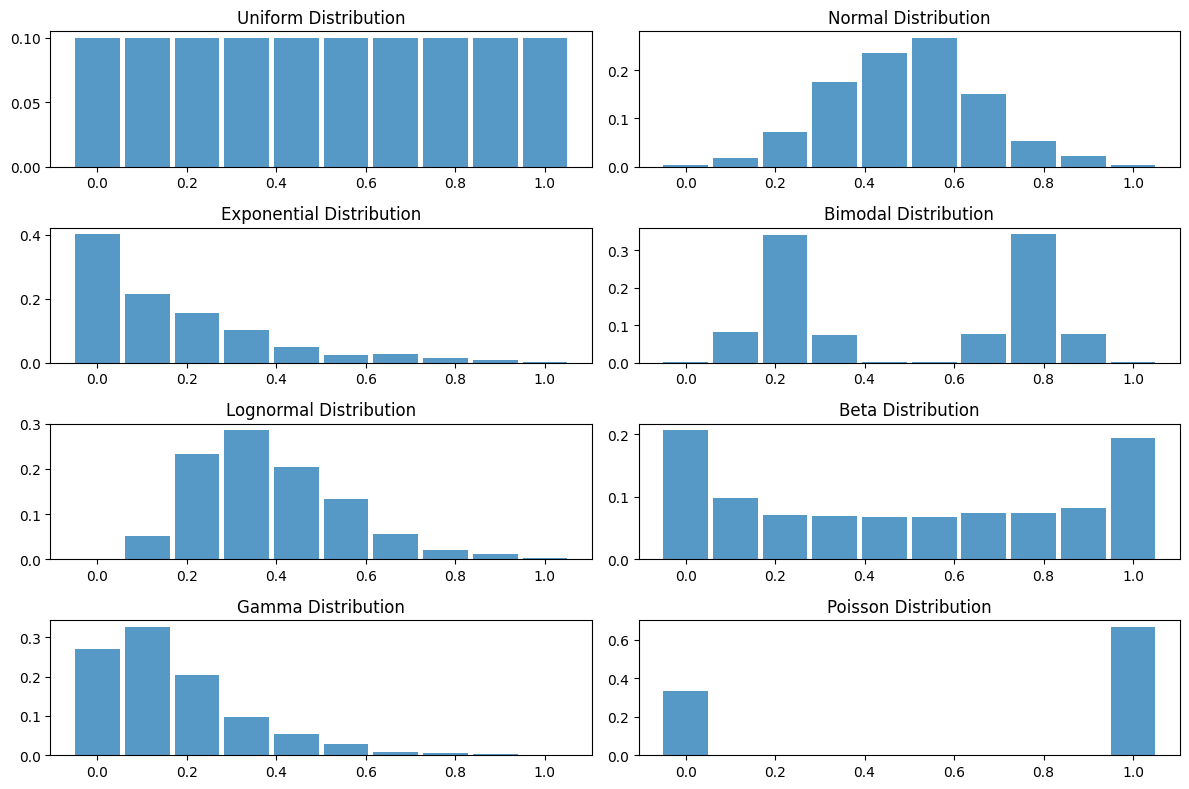

{'Uniform': array([0.55555556, 0.22222222, 0.11111111, 0.22222222, 1.        ,
        0.55555556, 0.88888889, 0.77777778, 0.77777778, 0.77777778,
        0.11111111, 0.55555556, 0.        , 0.44444444, 0.66666667,
        0.55555556, 0.11111111, 0.77777778, 0.        , 0.33333333,
        0.11111111, 0.66666667, 0.44444444, 0.22222222, 0.22222222,
        0.        , 0.33333333, 0.11111111, 0.55555556, 0.44444444,
        0.77777778, 0.44444444, 0.66666667, 0.44444444, 0.        ,
        0.77777778, 0.22222222, 0.11111111, 0.77777778, 0.55555556,
        0.22222222, 1.        , 0.11111111, 0.55555556, 0.22222222,
        0.        , 0.        , 0.11111111, 0.77777778, 0.33333333,
        0.44444444, 0.33333333, 0.77777778, 0.11111111, 0.66666667,
        0.22222222, 0.88888889, 0.        , 0.        , 0.22222222,
        0.33333333, 0.66666667, 0.        , 0.44444444, 0.55555556,
        0.77777778, 0.33333333, 1.        , 0.55555556, 0.44444444,
        0.77777778, 0.11111111, 0.777

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bins
bins = 10

# Number of samples for each distribution
n_samples = 1000

# Defining the empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.15, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples/2)), np.random.normal(0.75, 0.05, int(n_samples/2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=-1, sigma=0.4, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Poisson': np.histogram(np.random.poisson(lam=2, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions (if they aren't already normalized)
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Generate input data (X) by sampling from these distributions
input_data = {}
for key in distributions:
    input_data[key] = np.random.choice(np.linspace(0, 1, bins), size=n_samples, p=distributions[key])

# Visualize the distributions
plt.figure(figsize=(12, 8))
for i, (key, values) in enumerate(distributions.items()):
    plt.subplot(4, 2, i+1)
    plt.bar(np.linspace(0, 1, bins), values, width=0.1, alpha=0.75)
    plt.title(f'{key} Distribution')
    plt.tight_layout()

plt.show()

# Output first few samples of input data to verify
input_data


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Number of bins
bins = 10

# Number of samples for each distribution
n_samples = 1000

# Defining the empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.15, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples/2)), np.random.normal(0.75, 0.05, int(n_samples/2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=-1, sigma=0.4, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Poisson': np.histogram(np.random.poisson(lam=2, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions (if they aren't already normalized)
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Calculate true entropies
def compute_shannon_entropy(p):
    p = p[p > 0]  # Remove zero probabilities for log calculations
    return -np.sum(p * np.log2(p))

true_entropies = {key: compute_shannon_entropy(dist) for key, dist in distributions.items()}

# Convert the distributions into feature vectors (X) and entropies as targets (y)
X = np.array([distributions[key] for key in distributions])  # Shape: (num_distributions, bins)
y = np.array([true_entropies[key] for key in true_entropies])  # Shape: (num_distributions,)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(32, input_shape=(bins,), activation='relu'),  # Input shape is (bins,)
    Dense(64, activation='relu'),
    Dense(1)  # Output single value (entropy)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5.8039 - val_loss: 8.3467
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 5.7437 - val_loss: 8.2785
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 5.6842 - val_loss: 8.2102
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 5.6238 - val_loss: 8.1407
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 5.5619 - val_loss: 8.0716
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 5.4997 - val_loss: 8.0032
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 5.4380 - val_loss: 7.9367
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.3773 - val_loss: 7.8714
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 5.3161 - val_loss: 7.8047
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.2551 - val_loss: 7.7364
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.1951 - val_loss: 7.6659
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 5.1340 - val

In [9]:
# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test loss (MSE): {loss}")

# Predict entropies for test data
y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4818
Test loss (MSE): 0.48177778720855713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


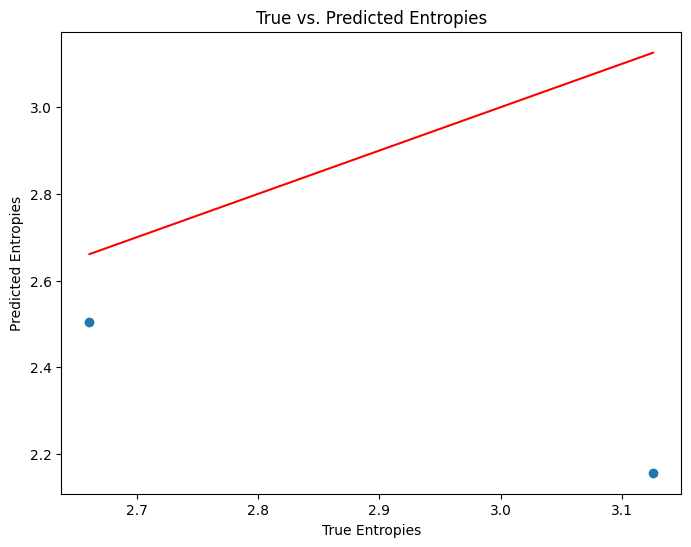

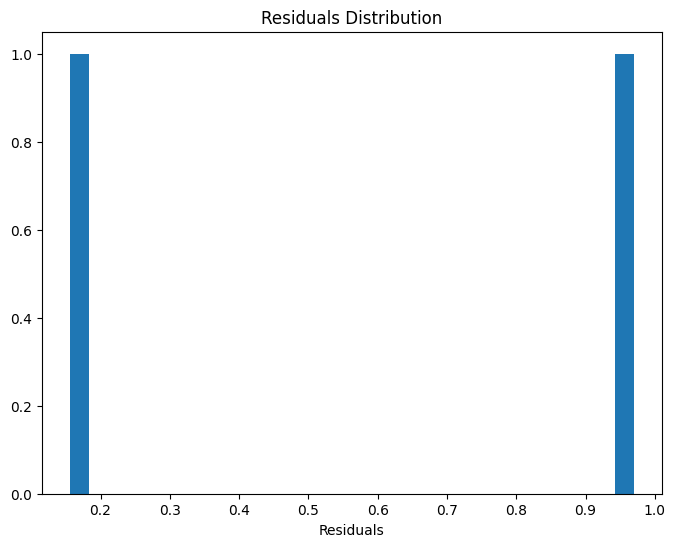

In [10]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot True vs Predicted Entropies
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('True Entropies')
plt.ylabel('Predicted Entropies')
plt.title('True vs. Predicted Entropies')
plt.show()

# Plot residuals distribution
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()
